In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

import sys
sys.path.append('../mchem_functions')
import PCA_functions as pcf
import multivariate_functions as mvf

In [23]:
chosen_PCs = [1,2]
no_of_components = 5

scaling_method = 'standard'

samples_to_exclude = ['SRFA','HM-B-Win1','AM-A-Win1','HM-PL-Win1','HM-G-Win1']
vars_to_exclude = ['unassigned','P','Cl','F',]

ms_data_dir = '../../Data/MS_data'
meta_data_csv = 'CSV_files/processed_csv_data_dir/meta_data.csv'

In [24]:
try: os.chdir(ms_data_dir)
except FileNotFoundError: pass

In [25]:
meta_data_df = pd.read_csv(meta_data_csv,index_col=0)
sample_names = list(meta_data_df.index)
variables = list(meta_data_df.columns)

In [26]:
for sample in samples_to_exclude:
    for sample2 in [name for name in sample_names if sample in name]:
        sample_names.remove(sample2)

In [27]:
def matr_colormesh(arr,x=[],y=[],cmap='viridis'):
    fig, ax = plt.subplots()

    mappable = ax.pcolormesh(arr,cmap=cmap)
    fig.colorbar(mappable)

    ax.set_ylim(np.max(ax.get_ylim()),np.min(ax.get_ylim()))

    if len(x) != 0:
        locationsx = np.arange(len(x))+0.5
        ax.set_xticks(locationsx, x, rotation=90, ha='center')
    if len(y) != 0:
        locationsy = np.arange(len(y))+0.5
        ax.set_yticks(locationsy, y)

In [28]:
meta_data_df = meta_data_df.loc[sample_names]

for var in vars_to_exclude:
    for var2 in [variable for variable in variables if var in variable]:
        variables.remove(var2)

meta_data_df = meta_data_df[variables]
meta_data_arr = meta_data_df.to_numpy()

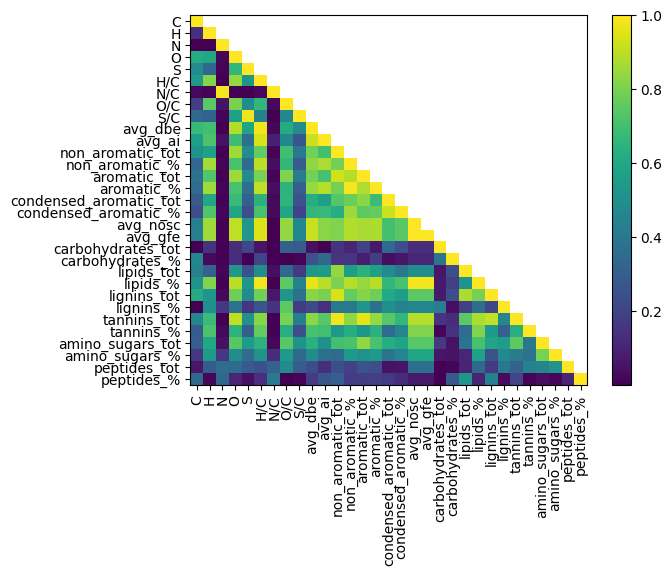

In [29]:
corrs = []
for i in range(np.shape(meta_data_arr)[1]):
    row = []
    for j in range(np.shape(meta_data_arr)[1]):
        row.append((scipy.stats.linregress(meta_data_arr[:,i], meta_data_arr[:,j])[2])**2)
    corrs.append(row)
corrs = np.array(corrs)
tril = np.tril(corrs)
zeroless = np.ma.masked_where(tril == 0, tril)
matr_colormesh(zeroless,x=variables,y=variables)

In [30]:
# choose variables depending on redundancy of information to avoid double counting
vars_to_exclude += ['_tot','ai']

In [31]:
for var in vars_to_exclude:
    for var2 in [variable for variable in variables if var in variable]:
        variables.remove(var2)

meta_data_df = meta_data_df[variables]

meta_data_arr = meta_data_df.to_numpy()

abbr = ['ai','dbe','gfe','nosc']
for i in range(len(variables)):
    v = variables[i]
    
    for a in abbr: v = v.replace(a.lower(),a.upper())
    v = v.replace('_',' ').replace('avg','average').replace(' %',' (%)')

    v = v[0].upper() + v[1:]

    variables[i] = v

# variables

In [32]:
pd.DataFrame(meta_data_arr)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,18.223757,25.653315,0.169890,7.172652,0.062155,1.407685,0.009322,0.393588,0.003411,6.482044,...,1.104972,0.000000,-0.519093,75.094144,0.276243,48.756906,18.784530,16.160221,0.000000,1.104972
1,17.345161,24.341935,0.109677,7.141935,0.090323,1.403385,0.006323,0.411754,0.005207,6.229032,...,0.000000,0.000000,-0.497842,74.488490,1.612903,49.677419,18.387097,15.483871,0.000000,2.258065
2,18.559099,25.003752,0.076923,7.063790,0.086304,1.347250,0.004145,0.380611,0.004650,7.095685,...,2.626642,0.000000,-0.538283,75.641066,0.375235,48.780488,23.264540,11.444653,0.000000,0.375235
3,18.285858,22.029087,0.059178,7.542628,0.064193,1.204706,0.003236,0.412484,0.003511,8.300903,...,6.720160,1.203611,-0.306484,69.034795,0.100301,34.503511,20.060181,23.169509,0.000000,0.601805
4,19.550496,21.740222,0.152364,8.709282,0.131932,1.112004,0.007793,0.445476,0.006748,9.756567,...,8.639813,0.934034,-0.137100,64.207347,0.116754,23.934618,16.870987,24.810274,0.291886,1.050788
5,19.263158,25.864372,0.107287,7.504049,0.076923,1.342686,0.005570,0.389554,0.003993,7.384615,...,1.012146,0.000000,-0.489607,74.253798,0.000000,44.736842,23.886640,15.991903,0.000000,0.809717
6,19.912281,21.447131,0.124229,9.113324,0.120910,1.077081,0.006239,0.457674,0.006072,10.250830,...,8.914177,2.655287,-0.078504,62.537376,0.237079,21.621622,14.746325,23.565671,0.189663,0.426743
7,19.707497,24.133052,0.073918,7.861668,0.106653,1.224562,0.003751,0.398918,0.005412,8.677930,...,3.484688,0.316790,-0.362475,70.630543,0.105597,36.114044,23.020063,20.485744,0.000000,0.739176
8,18.509569,23.086124,0.186603,7.619617,0.083732,1.247253,0.010081,0.411658,0.004524,8.059809,...,3.588517,0.717703,-0.340557,70.005872,0.239234,37.081340,18.899522,21.052632,0.239234,2.631579
9,19.433107,23.870748,0.142857,7.933107,0.112245,1.228355,0.007351,0.408226,0.005776,8.569161,...,3.174603,0.453515,-0.327210,69.625474,0.340136,36.507937,21.768707,21.541950,0.000000,0.793651


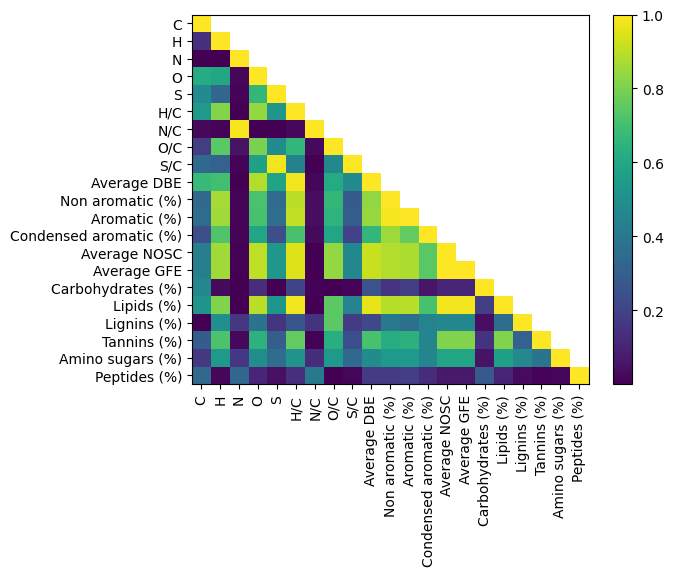

In [33]:
corrs = []
for i in range(np.shape(meta_data_arr)[1]):
    row = []
    for j in range(np.shape(meta_data_arr)[1]):
        row.append((scipy.stats.linregress(meta_data_arr[:,i], meta_data_arr[:,j])[2])**2)
    corrs.append(row)
corrs = np.array(corrs)
tril = np.tril(corrs)
zeroless = np.ma.masked_where(tril == 0, tril)
matr_colormesh(zeroless)
ax = plt.gca()

locationsx = np.arange(len(variables))+0.5
locationsy = np.arange(len(variables))+0.5
ax.set_xticks(locationsx, variables, rotation = 90)
ax.set_yticks(locationsy, variables)

In [34]:
sample_info = {
    'Site': [],
    'Letter': [],
    'Season': [],
    'Type': [],
}

for name in sample_names:
    if 'SRFA' in name.upper():
        sample_info['Site'].append('NA')
        sample_info['Letter'].append('NA')
        sample_info['Season'].append('NA')
        sample_info['Type'].append('SRFA')

    else:
        name = name.split('-')
        sample_info['Site'].append(name[0])
        sample_info['Letter'].append(name[1])
        sample_info['Season'].append(name[2])
        if 'PL' in name:
            sample_info['Type'].append('PL')
        else:
            sample_info['Type'].append('PW')

for info in sample_info:
    sample_info[info] = np.array(sample_info[info])
# sample_info

In [35]:
scores_values, variance_ratio, PCs, loadings = pcf.get_pca_data(meta_data_arr,no_of_components,scaling_method)

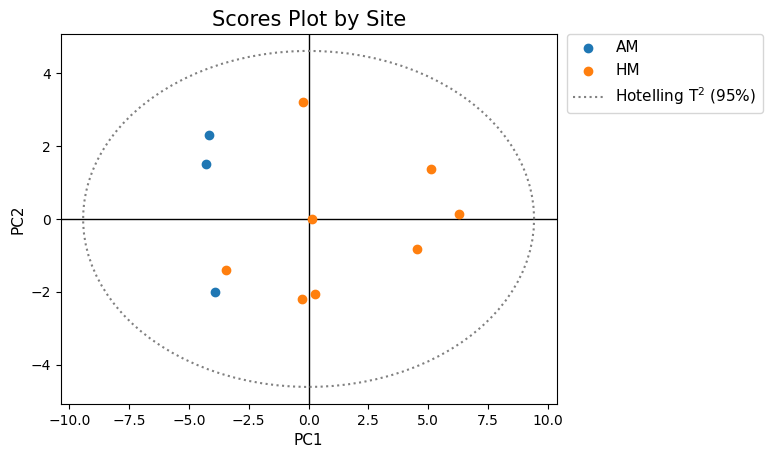

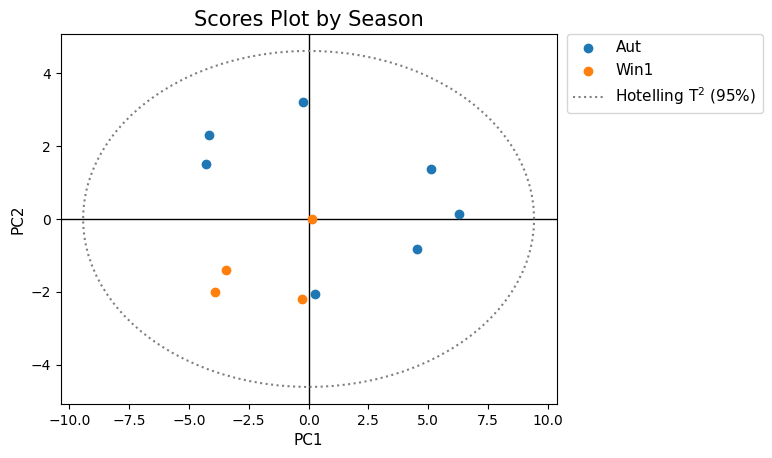

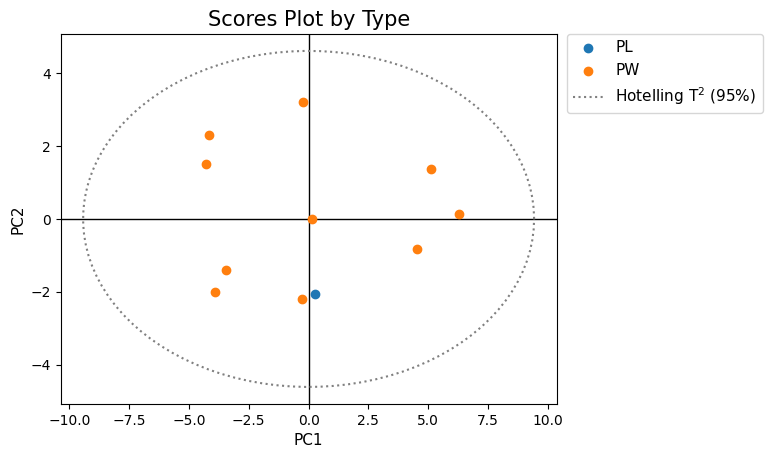

In [36]:
chosen_info = []
if chosen_info in [None,[],[None]]:
    chosen_info = list(sample_info.keys())
    if 'Letter' in chosen_info: chosen_info.remove('Letter')

for info in chosen_info:
    unique_info = np.unique(sample_info[info])

    fig_scores, ax_scores = plt.subplots()
    
    for u in unique_info:
        idx = np.where(sample_info[info] == u)
        pcf.scores_plot(scores_values[idx],chosen_PCs,lines=False,ax=ax_scores,label=u)
    
    pcf.Hotelling(scores_values,chosen_PCs,ax_scores)

    ax_scores.set_title(f'Scores Plot by {info}',fontsize=15)
    ax_scores.axhline(y=0, color = '#000', linewidth = 1, zorder=-1)
    ax_scores.axvline(x=0, color = '#000', linewidth = 1, zorder=-1)

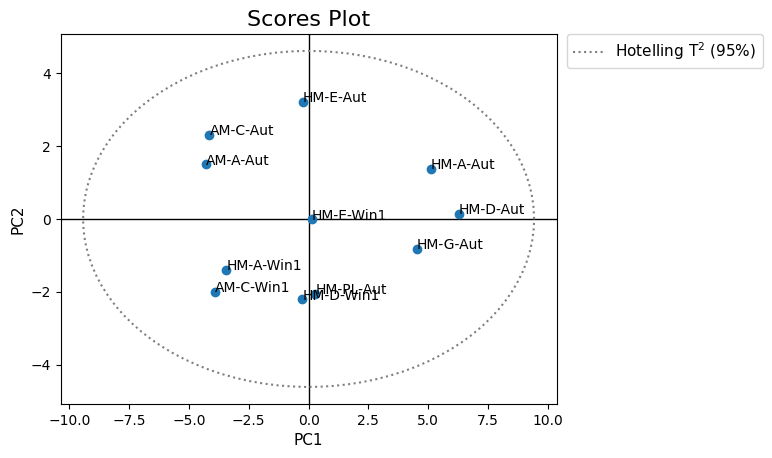

In [37]:
pcf.scores_plot(scores_values,chosen_PCs)
pcf.Hotelling(scores_values,chosen_PCs,plt.gca())
for i in range(len(sample_names)):
    plt.text(scores_values[i,chosen_PCs[0]-1],scores_values[i,chosen_PCs[1]-1],sample_names[i])

In [38]:
scores_values

array([[-4.29214912,  1.50038218, -0.91718484, -1.39918489, -1.18349843],
       [-4.14408433,  2.31356583,  2.74002973,  1.54701307,  0.16556574],
       [-3.93038367, -2.00144546,  0.24709946,  0.64712146, -0.68858377],
       [ 0.28410623, -2.06554289,  1.6535759 , -2.31505366,  0.80818826],
       [ 5.11691907,  1.36440254, -0.76158761,  0.76945161,  0.24482322],
       [-3.43160058, -1.40775814, -1.44748254, -0.10413934, -0.06569886],
       [ 6.26513422,  0.14052204,  0.38022307,  0.08196924, -1.05995229],
       [-0.26669724, -2.21081384, -0.68402769,  1.11173994,  0.89805228],
       [-0.24829229,  3.2074847 , -0.89118148, -1.2320668 ,  0.95982955],
       [ 0.13238317, -0.01318095, -1.25638837,  1.19645897,  0.30437253],
       [ 4.51466453, -0.82761603,  0.93692437, -0.30330959, -0.38309823]])

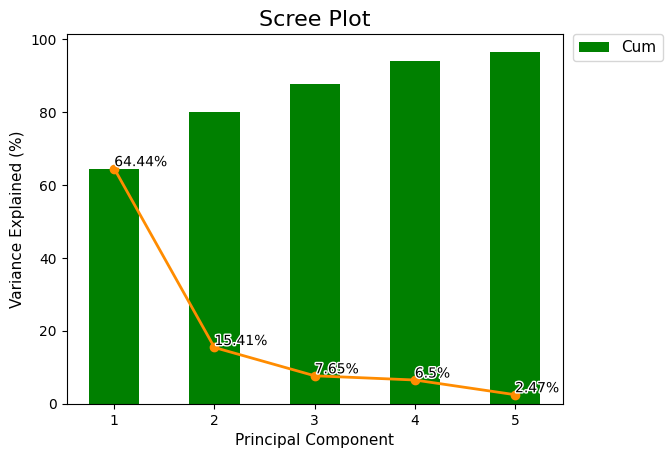

In [39]:
pcf.scree_plot(PCs,variance_ratio,save_path=f'plots/pca_plots/scree_plot.svg')

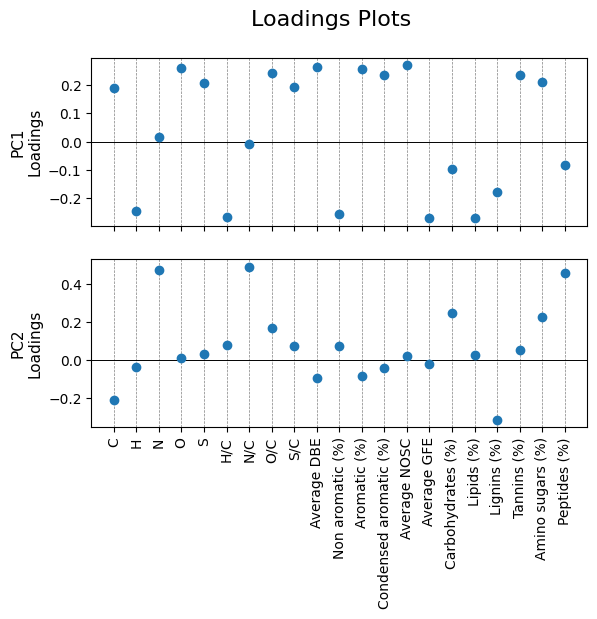

In [40]:
fig_loadings = plt.figure()
ax_loadings = fig_loadings.subplots(len(chosen_PCs),sharex=True)

pcf.loadings_plot(variables,loadings.T,chosen_PCs,text_rotation=90,linestyle='',marker='o',ax=ax_loadings,fig=fig_loadings)

for ax in ax_loadings:
    for i in range(len(variables)):
        ax.axvline(i,ls='--',lw=.5,c='gray',zorder=-1)

fig_loadings.savefig(f'plots/pca_plots/loadings_plots.svg', dpi = 600, facecolor = '#fff', bbox_inches='tight')

In [41]:
m_shape = {
    'Hare Moss': 'o',
    'Auchencorth Moss': 's',
}

seasonal_colours = {
    'Aut': '#BF5700', # burnt orange
    'Win1': '#4B61D1', # Savoy blue
    'Win2': '#4E2A84', # northwestern purple
    'Spr': '#E0B0FF', # mauve
    'Sum': '#50C878', # emerald green
}

In [42]:
sitelong = [{'AM':'Auchencorth Moss','HM':'Hare Moss'}[site] for site in sample_info['Site']]
sample_info['sitelong'] = np.array(sitelong)

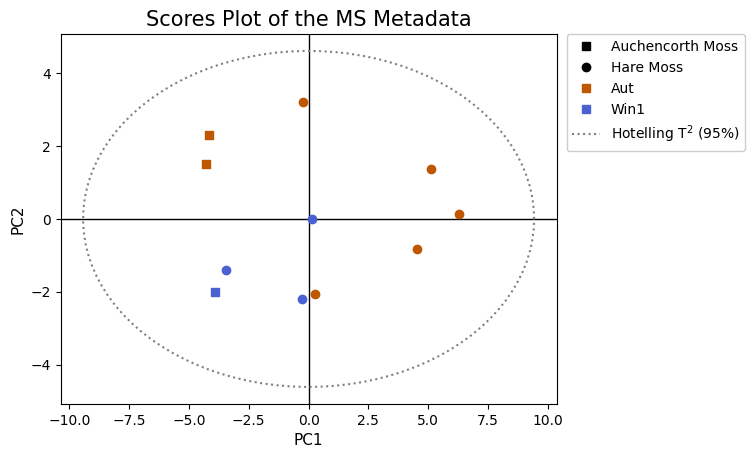

In [43]:
fig_scores, ax_scores = plt.subplots()

for site in np.unique(sample_info['sitelong']):
    for season in np.unique(sample_info['Season']):

        idx = np.where((sample_info['sitelong'] == site)&(sample_info['Season'] == season))

        pcf.scores_plot(scores_values[idx],chosen_PCs,lines=False,ax=ax_scores,marker=m_shape[site],c=seasonal_colours[season])
        
pcf.Hotelling(scores_values,chosen_PCs,ax_scores)

title = f'Scores Plot of the MS Metadata'
ax_scores.set_title(title,fontsize=15)
ax_scores.axhline(y=0, color = '#000', linewidth = 1, zorder=-1)
ax_scores.axvline(x=0, color = '#000', linewidth = 1, zorder=-1)

# Adapted from https://stackoverflow.com/questions/45140295/how-to-create-a-legend-of-both-color-and-marker
f = lambda m,c,ls: ax_scores.plot([],[],marker=m, color=c, ls=ls)[0]
handles = []
labels  = []
for site in np.unique(sample_info['sitelong']):
    handles.append(f(m_shape[site], "k", ls="none"))
    labels.append(site)
for season in np.unique(sample_info['Season']):
    handles.append(f('s', seasonal_colours[season],ls="none"))
    labels.append(season)

handles += [f('none', "grey",ls=":")]
labels += ['Hotelling T$^{2}$ (95%)']
ax_scores.legend(handles, labels, framealpha=1,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
fig_scores.savefig(f'plots/pca_plots/{title.lower().replace(' ','_')}.svg', dpi = 600, facecolor = '#fff', bbox_inches='tight')


PCA by individual site

In [44]:
meta_data_arr_HM = meta_data_arr[np.where(sample_info['Site'] == 'HM')]
seasons_HM = np.array([x.split('-')[-1] for x in sample_names if x.startswith('HM-')])
meta_data_arr_AM = meta_data_arr[np.where(sample_info['Site'] == 'AM')]
seasons_AM = np.array([x.split('-')[-1] for x in sample_names if x.startswith('AM-')])

# remove all zeros
idx_2remove_AM = np.argwhere(np.all(meta_data_arr_AM[..., :] == 0, axis=0))
meta_data_arr_AM = np.delete(meta_data_arr_AM, idx_2remove_AM, axis=1)
variables_AM = np.delete(variables,idx_2remove_AM)
idx_2remove_HM = np.argwhere(np.all(meta_data_arr_HM[..., :] == 0, axis=0))
meta_data_arr_HM = np.delete(meta_data_arr_HM, idx_2remove_HM, axis=1)
variables_HM = np.delete(variables,idx_2remove_HM)

In [45]:
HM_PCs = np.min([len(meta_data_arr_HM),no_of_components])
AM_PCs = np.min([len(meta_data_arr_AM),no_of_components])

scores_values_HM, variance_ratio_HM, PCs_HM, loadings_HM = pcf.get_pca_data(meta_data_arr_HM,HM_PCs,scaling_method)
scores_values_AM, variance_ratio_AM, PCs_AM, loadings_AM = pcf.get_pca_data(meta_data_arr_AM,AM_PCs,scaling_method)

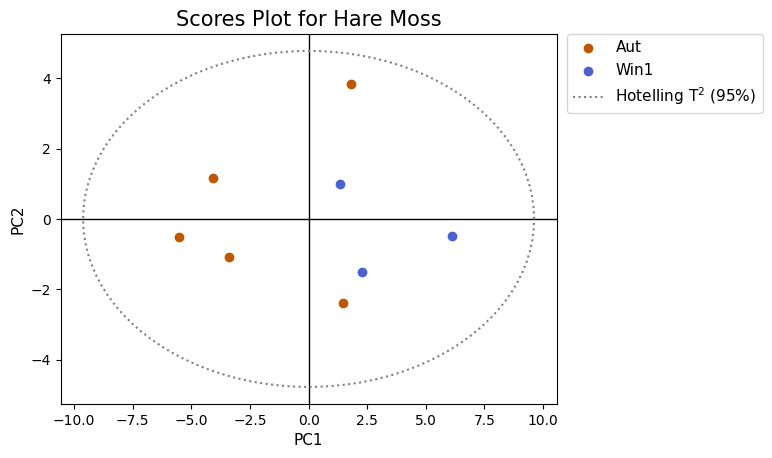

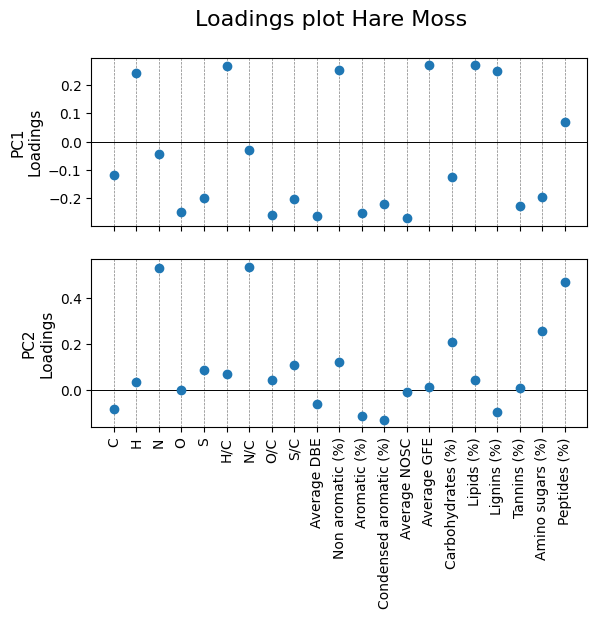

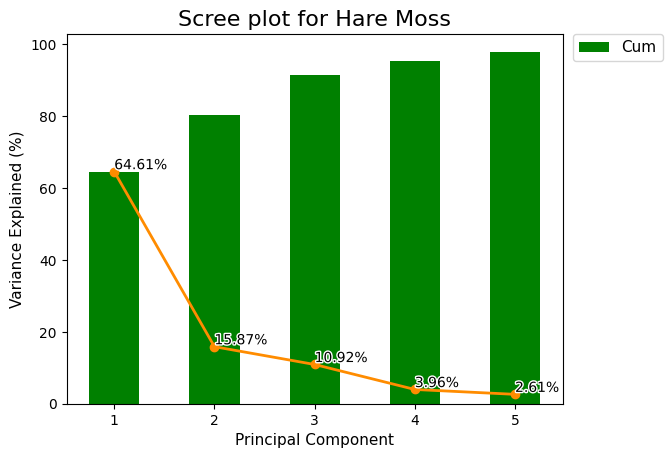

In [50]:
fig_scores, ax_scores = plt.subplots()

for season in np.unique(seasons_HM):

    idx = np.where(seasons_HM == season)

    pcf.scores_plot(scores_values_HM[idx],chosen_PCs,lines=False,ax=ax_scores,marker=m_shape['Hare Moss'],
                    c=seasonal_colours[season],label=season)
        
pcf.Hotelling(scores_values_HM,chosen_PCs,ax_scores)

ax_scores.set_title(f'Scores Plot for Hare Moss',fontsize=15)
ax_scores.axhline(y=0, color = '#000', linewidth = 1, zorder=-1)
ax_scores.axvline(x=0, color = '#000', linewidth = 1, zorder=-1)

#---

fig_loadings = plt.figure()
ax_loadings = fig_loadings.subplots(len(chosen_PCs),sharex=True)

pcf.loadings_plot(variables_HM,loadings_HM.T,chosen_PCs,text_rotation=90,linestyle='',
                  marker='o',ax=ax_loadings,title='Loadings plot Hare Moss',fig=fig_loadings)

for ax in ax_loadings:
    for i in range(len(variables_HM)):
        ax.axvline(i,ls='--',lw=.5,c='gray',zorder=-1)

#---

pcf.scree_plot(PCs_HM,variance_ratio_HM,title='Scree plot for Hare Moss')

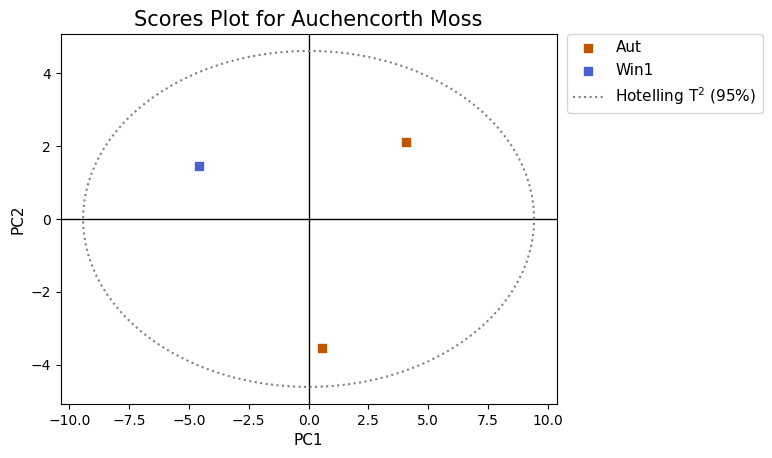

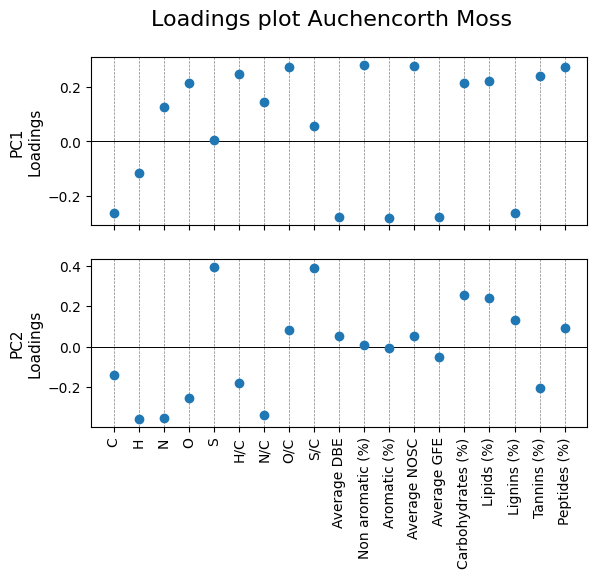

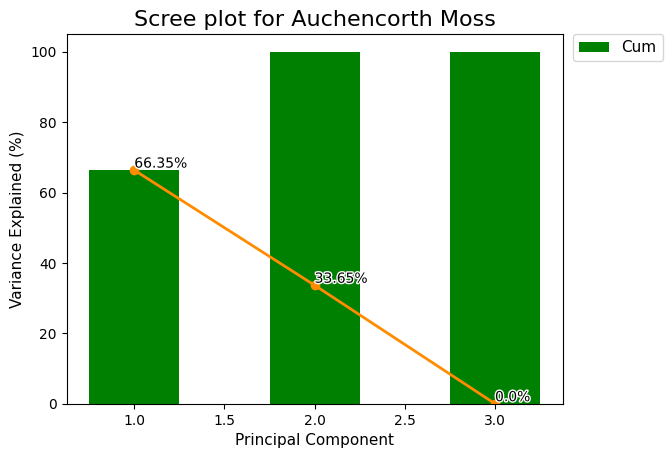

In [51]:
fig_scores, ax_scores = plt.subplots()

for season in np.unique(seasons_AM):

    idx = np.where(seasons_AM == season)

    pcf.scores_plot(scores_values_AM[idx],chosen_PCs,lines=False,ax=ax_scores,marker=m_shape['Auchencorth Moss'],
                    c=seasonal_colours[season],label=season)
        
pcf.Hotelling(scores_values,chosen_PCs,ax_scores)

ax_scores.set_title(f'Scores Plot for Auchencorth Moss',fontsize=15)
ax_scores.axhline(y=0, color = '#000', linewidth = 1, zorder=-1)
ax_scores.axvline(x=0, color = '#000', linewidth = 1, zorder=-1)

#---

fig_loadings = plt.figure()
ax_loadings = fig_loadings.subplots(len(chosen_PCs),sharex=True)

pcf.loadings_plot(variables_AM,loadings_AM.T,chosen_PCs,text_rotation=90,linestyle='',
                  marker='o',ax=ax_loadings,title='Loadings plot Auchencorth Moss',fig=fig_loadings)

for ax in ax_loadings:
    for i in range(len(variables_AM)):
        ax.axvline(i,ls='--',lw=.5,c='gray',zorder=-1)

#---

pcf.scree_plot(PCs_AM,variance_ratio_AM,title='Scree plot for Auchencorth Moss')